# Project Objectives
The goal of this project is to gather and wrangle data from the WeRateDogs Twitter account, and created interestng and trustworthy analyses and visualizations. Key objectives include
- Gather Data from Multiple Sources
- Assess Data & Document Issues in the Areas of Tidiness & Quality
- Clean Data for Analysis
- Create Visualizations and Provide Insight into the Data


In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy

## Gather

### Downloading Data

In order to begin data wrangling exercises, data will be gathered from provided documents as well as from accessing the Twitter API, which is then inputted into dataframes

In [2]:
#download twitter_archive_enhanced.csv
twit_arch = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
file_name = twit_arch.split('/')[-1]
response = requests.get(twit_arch)

with open(file_name, mode = 'wb') as file:
    file.write(response.content)

In [3]:
#Verify file
file_name

'twitter-archive-enhanced.csv'

In [4]:
twitter_archive = pd.read_csv(file_name)

In [5]:
twitter_archive.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2113  670434127938719744                    NaN                  NaN   
864   762464539388485633                    NaN                  NaN   
139   865359393868664832                    NaN                  NaN   
1503  692017291282812928                    NaN                  NaN   
2256  667766675769573376                    NaN                  NaN   
1077  739544079319588864                    NaN                  NaN   
1687  681579835668455424                    NaN                  NaN   
728   782021823840026624                    NaN                  NaN   
713   784183165795655680                    NaN                  NaN   
852   765395769549590528                    NaN                  NaN   
982   749403093750648834                    NaN                  NaN   
0     892420643555336193                    NaN                  NaN   
495   813172488309972993                    NaN                  NaN   
678   789268448748703744                    NaN                  NaN   
2276  667443425659232256                    NaN                  NaN   
2152  669680153564442624                    NaN                  NaN   
221   849776966551130114                    NaN                  NaN   
2316  666649482315059201                    NaN                  NaN   
817   770772759874076672                    NaN                  NaN   
1849  675781562965868544                    NaN                  NaN   

                      timestamp  \
2113  2015-11-28 02:48:46 +0000   
864   2016-08-08 01:44:46 +0000   
139   2017-05-19 00:12:11 +0000   
1503  2016-01-26 16:12:33 +0000   
2256  2015-11-20 18:09:16 +0000   
1077  2016-06-05 19:47:03 +0000   
1687  2015-12-28 20:57:50 +0000   
728   2016-10-01 00:58:26 +0000   
713   2016-10-07 00:06:50 +0000   
852   2016-08-16 03:52:26 +0000   
982   2016-07-03 00:43:15 +0000   
0     2017-08-01 16:23:56 +0000   
495   2016-12-26 00:00:03 +0000   
678   2016-10-21 00:53:56 +0000   
2276  2015-11-19 20:44:47 +0000   
2152  2015-11-26 00:52:45 +0000   
221   2017-04-06 00:13:11 +0000   
2316  2015-11-17 16:09:56 +0000   
817   2016-08-30 23:58:40 +0000   
1849  2015-12-12 20:57:34 +0000   

                                                 source  \
2113  <a href="http://twitter.com/download/iphone" r...   
864   <a href="http://twitter.com/download/iphone" r...   
139   <a href="http://twitter.com/download/iphone" r...   
1503  <a href="http://twitter.com/download/iphone" r...   
2256  <a href="http://twitter.com" rel="nofollow">Tw...   
1077  <a href="http://twitter.com/download/iphone" r...   
1687  <a href="http://twitter.com/download/iphone" r...   
728   <a href="http://twitter.com/download/iphone" r...   
713   <a href="http://vine.co" rel="nofollow">Vine -...   
852   <a href="http://twitter.com/download/iphone" r...   
982   <a href="http://twitter.com/download/iphone" r...   
0     <a href="http://twitter.com/download/iphone" r...   
495   <a href="http://twitter.com/download/iphone" r...   
678   <a href="http://twitter.com/download/iphone" r...   
2276  <a href="http://twitter.com/download/iphone" r...   
2152  <a href="http://twitter.com/download/iphone" r...   
221   <a href="http://twitter.com/download/iphone" r...   
2316  <a href="http://twitter.com/download/iphone" r...   
817   <a href="http://twitter.com/download/iphone" r...   
1849  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2113  Meet Hank and Sully. Hank is very proud of the...                  NaN   
864   This is Buddy. His father was a bear and his m...                  NaN   
139   This is Sammy. Her tongue ejects without warni...                  NaN   
1503  This is Kingsley Wellensworth III. He owns 7 r...                  NaN   
2256  This is Calvin. He is a Luxembourgian Mayo. Ha...                  NaN   
1077  This... is a Tyrannosaurus rex. We only r

In [6]:
#download image_predictions.tsv
image_pred = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = image_pred.split('/')[-1]
response = requests.get(image_pred)

with open(file_name, mode = 'wb') as file:
    file.write(response.content)

In [7]:
#Verify file
file_name

'image-predictions.tsv'

In [8]:
img_pred = pd.read_csv(file_name, sep = '\t')

In [9]:
img_pred.sample(3)

tweet_id                                          jpg_url  \
1351  759846353224826880  https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg   
263   670792680469889025  https://pbs.twimg.com/media/CU8iYi2WsAEaqQ0.jpg   
532   676864501615042560  https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg   

      img_num                        p1   p1_conf  p1_dog             p2  \
1351        1            Sussex_spaniel  0.355395    True         vizsla   
263         1                brown_bear  0.882426   False     toy_poodle   
532         1  Chesapeake_Bay_retriever  0.371146    True  water_buffalo   

       p2_conf  p2_dog                p3   p3_conf  p3_dog  
1351  0.141094    True        otterhound  0.092198    True  
263   0.031355    True  miniature_poodle  0.025743    True  
532   0.099596   False        Weimaraner  0.048968    True

### Query Data via Twitter API

Using the `tweepy` library and credentials for the Twitter API, data is queried from the WeRateDogs Twitter handle

In [10]:
import tweepy
from timeit import default_timer as timer
import sys

In [ ]:
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


The data is queried in a JSON format, hence we use the `json.dump()` to write the data into the `tweet_json.txt` file

In [ ]:
#First pull data for all status ids in to a tweet_j_son.txt
import json
json_file = 'tweet_json.txt'

with open(json_file, mode = 'w') as file:
    for index, row in twitter_archive.iterrows():
        try:
            tweet = api.get_status(twitter_archive.tweet_id[index], tweet_mode= 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print(e)
    

In [11]:
#flyover STEP
json_file = 'tweet_json.txt'

In [12]:
#Now read test file line by line into a dataframe
df_list = []

with open(json_file, encoding='utf-8') as file:
    
    for line in file:
        add_d = json.loads(line)
        df_list.append({'tweet_id':add_d['id_str'], 'retweet_ct': add_d['retweet_count'], 'favorite_ct': add_d['favorite_count']})
      

In [13]:
addl_data = pd.DataFrame(df_list, columns = ['tweet_id','retweet_ct','favorite_ct' ])

In [14]:
#Assess data collected via Twitter API
addl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id       2339 non-null object
retweet_ct     2339 non-null int64
favorite_ct    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


## Assess

Performing visual and programmatic assessments on the data sets downloaded to ascertain the quality and tidiness of the data
## Assessing twitter_archive dataset


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [17]:
num_max = twitter_archive.rating_numerator.max()
twitter_archive[twitter_archive['rating_numerator'] == num_max]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
979  749981277374128128                    NaN                  NaN   

                     timestamp  \
979  2016-07-04 15:00:45 +0000   

                                                source  \
979  <a href="https://about.twitter.com/products/tw...   

                                                  text  retweeted_status_id  \
979  This is Atticus. He's quite simply America af....                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
979                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
979  https://twitter.com/dog_rates/status/749981277...              1776   

     rating_denominator     name doggo floofer pupper puppo  
979                  10  Atticus  None    None   None  None

In [18]:
num_min = twitter_archive.rating_numerator.min()
twitter_archive[twitter_archive['rating_numerator'] == num_min]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                 source  \
315   <a href="http://twitter.com/download/iphone" r...   
1016  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
315   When you're so blinded by your systematic plag...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
315                        NaN                        NaN   
1016                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
315   https://twitter.com/dog_rates/status/835152434...                 0   
1016  https://twitter.com/dog_rates/status/746906459...                 0   

      rating_denominator  name doggo floofer pupper puppo  
315                   10  None  None    None   None  None  
1016                  10  None  None    None   None  None

In [19]:
den_max = twitter_archive.rating_denominator.max()
twitter_archive[twitter_archive['rating_denominator'] == den_max]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1120  731156023742988288                    NaN                  NaN   

                      timestamp  \
1120  2016-05-13 16:15:54 +0000   

                                                 source  \
1120  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1120  Say hello to this unbelievably well behaved sq...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1120                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1120  https://twitter.com/dog_rates/status/731156023...               204   

      rating_denominator  name doggo floofer pupper puppo  
1120                 170  this  None    None   None  None

In [20]:
den_min = twitter_archive.rating_denominator.min()
twitter_archive[twitter_archive['rating_denominator'] == den_min]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

In [21]:
# further investigation of data
print('Sample in_reply_to_status_id:', twitter_archive['in_reply_to_status_id'].sample(1),'\n')
print('Sample in_reply_to_user_id:', twitter_archive['in_reply_to_user_id'].sample(1),'\n')
print('Sample source:', twitter_archive['source'].sample(1),'\n')
print('Sample retweeted_status_id:', twitter_archive['retweeted_status_id'].sample(1),'\n')
print('Sample retweeted_status_user_id:', twitter_archive['retweeted_status_user_id'].sample(1),'\n')
print('Sample expanded_urls:', twitter_archive['expanded_urls'].sample(1),'\n')

Sample in_reply_to_status_id: 1411   NaN
Name: in_reply_to_status_id, dtype: float64 

Sample in_reply_to_user_id: 720   NaN
Name: in_reply_to_user_id, dtype: float64 

Sample source: 1005    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object 

Sample retweeted_status_id: 1859   NaN
Name: retweeted_status_id, dtype: float64 

Sample retweeted_status_user_id: 1597   NaN
Name: retweeted_status_user_id, dtype: float64 

Sample expanded_urls: 788    https://twitter.com/dog_rates/status/774314403...
Name: expanded_urls, dtype: object 



In [22]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twitter_archive.query("rating_denominator == 0")

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

In [24]:
twitter_archive['name'].value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Penny           10
Lola            10
Tucker          10
Winston          9
Bo               9
the              8
Sadie            8
Daisy            7
Buddy            7
an               7
Toby             7
Bailey           7
Scout            6
Rusty            6
Leo              6
Dave             6
Oscar            6
Bella            6
Jack             6
Koda             6
Jax              6
Stanley          6
Milo             6
Oakley           5
              ... 
Mutt             1
Lacy             1
Kanu             1
Chef             1
Bauer            1
Fido             1
Gin              1
Chase            1
Katie            1
Mary             1
Remy             1
Stu              1
Sprout           1
Carll            1
Ike              1
Lilah            1
Shakespeare      1
Mingus           1
Franq            1
Koko             1
Shawwn           1
Margo       

In [25]:
sum(twitter_archive.duplicated())

0

In [26]:
twitter_archive[twitter_archive.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [27]:
twitter_archive[twitter_archive['name'] == "None"]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
32    886054160059072513                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
55    881633300179243008           8.816070e+17         4.738443e+07   
59    880872448815771648                    NaN                  NaN   
62    880095782870896641                    NaN                  NaN   
64    879674319642796034           8.795538e+17         3.105441e+09   
72    878604707211726852                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
83    876537666061221889                    NaN                  NaN   
88    875097192612077568                    NaN                  NaN   
89    875021211251597312                    NaN                  NaN   
93    874057562936811520                    NaN                  NaN   
96    873580283840344065                    NaN                  NaN   
99    872967104147763200                    NaN                  NaN   
100   872820683541237760                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
103   872486979161796608                    NaN                  NaN   
110   871102520638267392                    NaN                  NaN   
112   870804317367881728                    NaN                  NaN   
113   870726314365509632           8.707262e+17         1.648776e+07   
...                  ...                    ...                  ...   
2294  667138269671505920                    NaN                  NaN   
2298  667070482143944705           6.670655e+17         4.196984e+09   
2299  667065535570550784                    NaN                  NaN   
2301  667044094246576128                    NaN                  NaN   
2305  666837028449972224                    NaN                  NaN   
2306  666835007768551424                    NaN                  NaN   
2307  666826780179869698                    NaN                  NaN   
2310  666786068205871104                    NaN                  NaN   
2316  666649482315059201                    NaN                  NaN   
2320  666437273139982337                    NaN                  NaN   
2321  666435652385423360                    NaN                  NaN   
2322  666430724426358785                    NaN                  NaN   
2323  666428276349472768                    NaN                  NaN   
2324  666421158376562688                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN         

In [28]:
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


tweet_id                                               text  \
45    883482846933004288  This is Bella. She hopes her smile made you sm...   
340   832215909146226688  RT @dog_rates: This is Logan, the Chow who liv...   
695   786709082849828864  This is Logan, the Chow who lived. He solemnly...   
763   778027034220126208  This is Sophie. She's a Jubilant Bush Pupper. ...   
1689  681340665377193984  I've been told there's a slight possibility he...   
1712  680494726643068929  Here we have uncovered an entire battalion of ...   

      rating_numerator  
45                   5  
340                 75  
695                 75  
763                 27  
1689                 5  
1712                26

In [29]:
#testing
twitter_archive.text[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

## Assessing img_pred dataset

In [30]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
img_pred.sample(3)

tweet_id                                          jpg_url  \
755   688385280030670848  https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg   
69    667188689915760640  https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg   
1965  867421006826221569  https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg   

      img_num                p1   p1_conf  p1_dog              p2   p2_conf  \
755         2  golden_retriever  0.900437    True  cocker_spaniel  0.022292   
69          1            vacuum  0.335830   False            swab  0.265278   
1965        1        Eskimo_dog  0.616457    True  Siberian_husky  0.381330   

      p2_dog             p3   p3_conf  p3_dog  
755     True       sombrero  0.014997   False  
69     False  toilet_tissue  0.140703   False  
1965    True       malamute  0.001670    True

In [32]:
img_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

## Assessing addl_data

In [33]:
addl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id       2339 non-null object
retweet_ct     2339 non-null int64
favorite_ct    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [34]:
addl_data[addl_data.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, retweet_ct, favorite_ct]
Index: []

## Assessment Results

### Tidiness
- Four variables in four columns in `twitter_archives`
- `addl_data` table should be part of the `twitter_archives` table
- `img_num` column in `img_pred` table does not provide relevant information
- Residual columns created from simplipying of the `doggo, floofer, pupper and puppo` columns are present
- Retweet related columns in `twitter_archives` have no data after all retweets are removed from the table
- `twitter_archive` and `img_pred` tables can be merged

### Quality
#### `twitter_archive` table
- `timestamp` is an object instead of datetime64
- 'None' values in `doggo, floofer, pupper and puppo` columns should be NaN
- `tweet_id` 835246439529840640 has a `rating denominator of zero(0)
- Entry with `name` 'Atticus' and `rating_numerator` of 1776 is an outlier
- `tweet_id` column name and datatype should be the same in all three tables
- There are retweets present in the dataset
- The `name` in `twitter_archive` table column has many invalid values like , a, an, the.
- Some entries correlate with data in the `imd_pred` table, but are without images
- Ratings data extracted from `text` in correctly represented in rating related columns

#### `img_pred` table
- `tweet_id` is an int64 instead of a string- 

## Clean

In [35]:
twitter_archive_clean = twitter_archive.copy()

### Tidiness

#### 1. Four variables in four columns in `twitter_archives`
##### Define
Use the Pandas melt function to convert doggo, floofer, pupper and puppo columns into a single column. 

##### Code

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [37]:
check =  pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'], var_name='stage', value_name='stages')
check.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name  stage stages  
0                  10   Phineas  doggo   None  
1                  10     Tilly  doggo   None  
2                  10    Archie  doggo   None  
3                  10     Darla  doggo   None  
4                  10  Franklin  doggo   None

In [38]:
#Do a quick test to know number of rows in dataframe
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 15 columns):
tweet_id                      9424 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
stage                         9424 non-null object
stages                        9424 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 1.1+ MB


First, filter out values in dataset that have true value for dog stages

In [39]:
check_filter = check[check['stage'] == check['stages']]

In [40]:
check_filter.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
6113  699434518667751424                    NaN                  NaN   
624   795464331001561088                    NaN                  NaN   
6210  692417313023332352                    NaN                  NaN   
501   813096984823349248                    NaN                  NaN   
6648  673956914389192708                    NaN                  NaN   
6615  674638615994089473                    NaN                  NaN   
6199  693095443459342336                    NaN                  NaN   
6263  689143371370250240                    NaN                  NaN   
3378  746542875601690625                    NaN                  NaN   
6609  674737130913071104                    NaN                  NaN   

                      timestamp  \
6113  2016-02-16 03:25:58 +0000   
624   2016-11-07 03:14:10 +0000   
6210  2016-01-27 18:42:06 +0000   
501   2016-12-25 19:00:02 +0000   
6648  2015-12-07 20:07:04 +0000   
6615  2015-12-09 17:15:54 +0000   
6199  2016-01-29 15:36:45 +0000   
6263  2016-01-18 17:52:38 +0000   
3378  2016-06-25 03:17:46 +0000   
6609  2015-12-09 23:47:22 +0000   

                                                 source  \
6113  <a href="http://twitter.com/download/iphone" r...   
624   <a href="http://twitter.com/download/iphone" r...   
6210  <a href="http://twitter.com/download/iphone" r...   
501   <a href="http://twitter.com/download/iphone" r...   
6648  <a href="http://twitter.com/download/iphone" r...   
6615  <a href="http://twitter.com/download/iphone" r...   
6199  <a href="http://twitter.com/download/iphone" r...   
6263  <a href="http://twitter.com/download/iphone" r...   
3378  <a href="http://vine.co" rel="nofollow">Vine -...   
6609  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
6113  I know this is a tad late but here's a wonderf...                  NaN   
624   Elder doggo does a splash. Both 13/10 incredib...                  NaN   
6210  Meet Herschel. He's slightly bigger than ur av...                  NaN   
501   This is Rocky. He got triple-doggo-dared. Stuc...                  NaN   
6648  This is one esteemed pupper. Just graduated co...                  NaN   
6615  This pupper is fed up with being tickled. 12/1...                  NaN   
6199  This is Milo. He doesn't understand your fancy...                  NaN   
6263  Meet Trip. He likes wearing costumes that aren...                  NaN   
3378  Here's a golden floofer helping with the groce...                  NaN   
6609  Meet Rufio. He is unaware of the pink legless ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
6113                       NaN                        NaN   
624                        NaN                        NaN   
6210                       NaN                        NaN   
501                        NaN                        NaN   
6648                       NaN                        NaN   
6615                       NaN                        NaN   
6199                       NaN                        NaN   
6263                       NaN                        NaN   
3378                       NaN                        NaN   
6609                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
6113  https://twitter.com/dog_rates/status/699434518...                12   
624   https://twitter.com/dog_rates/status/795464331...                13   
6210  https://twitter.com/dog_rates/status/692417313...                 7   
501   https://twitter.com/dog_rates/status/813096984...                11   
6648  https://twitter.com/dog_rates/status/673956914...                10   
6615  https://twitter.com/dog_rates/status/674638615...                12   
6199  https://twitter.com/dog_rates/status/693095443...                10   
6263  https://twit

From the subset of data with true values for dog stages, we need to verify if any entires have more than one value (the `check_filter` dataframe)

In [41]:
#Check for duplicate entries with different stage values
check_filter[check_filter.tweet_id.duplicated()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2556  854010172552949760                    NaN                  NaN   
5172  817777686764523521                    NaN                  NaN   
5243  808106460588765185                    NaN                  NaN   
5277  802265048156610565           7.331095e+17         4.196984e+09   
5287  801115127852503040                    NaN                  NaN   
5417  785639753186217984                    NaN                  NaN   
5445  781308096455073793                    NaN                  NaN   
5490  775898661951791106                    NaN                  NaN   
5534  770093767776997377                    NaN                  NaN   
5601  759793422261743616                    NaN                  NaN   
5668  751583847268179968                    NaN                  NaN   
5775  741067306818797568                    NaN                  NaN   
5825  733109485275860992                    NaN                  NaN   
7259  855851453814013952                    NaN                  NaN   

                      timestamp  \
2556  2017-04-17 16:34:26 +0000   
5172  2017-01-07 16:59:28 +0000   
5243  2016-12-12 00:29:28 +0000   
5277  2016-11-25 21:37:47 +0000   
5287  2016-11-22 17:28:25 +0000   
5417  2016-10-11 00:34:48 +0000   
5445  2016-09-29 01:42:20 +0000   
5490  2016-09-14 03:27:11 +0000   
5534  2016-08-29 03:00:36 +0000   
5601  2016-07-31 16:50:42 +0000   
5668  2016-07-09 01:08:47 +0000   
5775  2016-06-10 00:39:48 +0000   
5825  2016-05-19 01:38:16 +0000   
7259  2017-04-22 18:31:02 +0000   

                                                 source  \
2556  <a href="http://twitter.com/download/iphone" r...   
5172  <a href="http://twitter.com/download/iphone" r...   
5243  <a href="http://twitter.com/download/iphone" r...   
5277  <a href="http://twitter.com/download/iphone" r...   
5287  <a href="http://twitter.com/download/iphone" r...   
5417  <a href="http://twitter.com/download/iphone" r...   
5445  <a href="http://vine.co" rel="nofollow">Vine -...   
5490  <a href="http://twitter.com/download/iphone" r...   
5534  <a href="http://twitter.com/download/iphone" r...   
5601  <a href="http://twitter.com/download/iphone" r...   
5668  <a href="http://twitter.com/download/iphone" r...   
5775  <a href="http://twitter.com/download/iphone" r...   
5825  <a href="http://twitter.com/download/iphone" r...   
7259  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2556  At first I thought this was a shy doggo, but i...                  NaN   
5172  This is Dido. She's playing the lead role in "...                  NaN   
5243  Here we have Burke (pupper) and Dexter (doggo)...                  NaN   
5277  Like doggo, like pupper version 2. Both 11/10 ...                  NaN   
5287  This is Bones. He's being haunted by another d...                  NaN   
5417  This is Pinot. He's a sophisticated doggo. You...                  NaN   
5445  Pupper butt 1, Doggo 0. Both 12/10 https://t.c...                  NaN   
5490  RT @dog_rates: Like father (doggo), like son (...         7.331095e+17   
5534  RT @dog_rates: This is just downright precious...         7.410673e+17   
5601  Meet Maggie &amp; Lila. Maggie is the doggo, L...                  NaN   
5668  Please stop sending it pictures that don't eve...                  NaN   
5775  This is just downright precious af. 12/10 for ...                  NaN   
5825  Like father (doggo), like son (pupper). Both 1...                  NaN   
7259  Here's a puppo participating in the #ScienceMa...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2556                       NaN                        NaN   
5172                       NaN                        NaN   
5243                       NaN                        NaN   
5277                       NaN                        NaN   
5287             

In [42]:
# Additional check to verify differences in duplicate tweet_id entries
check_filter[check_filter['tweet_id'] == 854010172552949760]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
200   854010172552949760                    NaN                  NaN   
2556  854010172552949760                    NaN                  NaN   

                      timestamp  \
200   2017-04-17 16:34:26 +0000   
2556  2017-04-17 16:34:26 +0000   

                                                 source  \
200   <a href="http://twitter.com/download/iphone" r...   
2556  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
200   At first I thought this was a shy doggo, but i...                  NaN   
2556  At first I thought this was a shy doggo, but i...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
200                        NaN                        NaN   
2556                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
200   https://twitter.com/dog_rates/status/854010172...                11   
2556  https://twitter.com/dog_rates/status/854010172...                11   

      rating_denominator  name    stage   stages  
200                   10  None    doggo    doggo  
2556                  10  None  floofer  floofer

For entries with more than one dog stage value, we will replace the values with the word 'mulitple' and drop duplicate entries. First we create a dataframe to contain duplicate `tweet_id` in the `check_filter` dataframe

In [43]:
#filter duplicates in 'check_filter' into new dataset
check_filter_dup = check_filter[check_filter.tweet_id.duplicated()]
check_filter_dup

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2556  854010172552949760                    NaN                  NaN   
5172  817777686764523521                    NaN                  NaN   
5243  808106460588765185                    NaN                  NaN   
5277  802265048156610565           7.331095e+17         4.196984e+09   
5287  801115127852503040                    NaN                  NaN   
5417  785639753186217984                    NaN                  NaN   
5445  781308096455073793                    NaN                  NaN   
5490  775898661951791106                    NaN                  NaN   
5534  770093767776997377                    NaN                  NaN   
5601  759793422261743616                    NaN                  NaN   
5668  751583847268179968                    NaN                  NaN   
5775  741067306818797568                    NaN                  NaN   
5825  733109485275860992                    NaN                  NaN   
7259  855851453814013952                    NaN                  NaN   

                      timestamp  \
2556  2017-04-17 16:34:26 +0000   
5172  2017-01-07 16:59:28 +0000   
5243  2016-12-12 00:29:28 +0000   
5277  2016-11-25 21:37:47 +0000   
5287  2016-11-22 17:28:25 +0000   
5417  2016-10-11 00:34:48 +0000   
5445  2016-09-29 01:42:20 +0000   
5490  2016-09-14 03:27:11 +0000   
5534  2016-08-29 03:00:36 +0000   
5601  2016-07-31 16:50:42 +0000   
5668  2016-07-09 01:08:47 +0000   
5775  2016-06-10 00:39:48 +0000   
5825  2016-05-19 01:38:16 +0000   
7259  2017-04-22 18:31:02 +0000   

                                                 source  \
2556  <a href="http://twitter.com/download/iphone" r...   
5172  <a href="http://twitter.com/download/iphone" r...   
5243  <a href="http://twitter.com/download/iphone" r...   
5277  <a href="http://twitter.com/download/iphone" r...   
5287  <a href="http://twitter.com/download/iphone" r...   
5417  <a href="http://twitter.com/download/iphone" r...   
5445  <a href="http://vine.co" rel="nofollow">Vine -...   
5490  <a href="http://twitter.com/download/iphone" r...   
5534  <a href="http://twitter.com/download/iphone" r...   
5601  <a href="http://twitter.com/download/iphone" r...   
5668  <a href="http://twitter.com/download/iphone" r...   
5775  <a href="http://twitter.com/download/iphone" r...   
5825  <a href="http://twitter.com/download/iphone" r...   
7259  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2556  At first I thought this was a shy doggo, but i...                  NaN   
5172  This is Dido. She's playing the lead role in "...                  NaN   
5243  Here we have Burke (pupper) and Dexter (doggo)...                  NaN   
5277  Like doggo, like pupper version 2. Both 11/10 ...                  NaN   
5287  This is Bones. He's being haunted by another d...                  NaN   
5417  This is Pinot. He's a sophisticated doggo. You...                  NaN   
5445  Pupper butt 1, Doggo 0. Both 12/10 https://t.c...                  NaN   
5490  RT @dog_rates: Like father (doggo), like son (...         7.331095e+17   
5534  RT @dog_rates: This is just downright precious...         7.410673e+17   
5601  Meet Maggie &amp; Lila. Maggie is the doggo, L...                  NaN   
5668  Please stop sending it pictures that don't eve...                  NaN   
5775  This is just downright precious af. 12/10 for ...                  NaN   
5825  Like father (doggo), like son (pupper). Both 1...                  NaN   
7259  Here's a puppo participating in the #ScienceMa...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2556                       NaN                        NaN   
5172                       NaN                        NaN   
5243                       NaN                        NaN   
5277                       NaN                        NaN   
5287             

In [44]:
#verify data set
check_filter_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2556 to 7259
Data columns (total 15 columns):
tweet_id                      14 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     14 non-null object
source                        14 non-null object
text                          14 non-null object
retweeted_status_id           2 non-null float64
retweeted_status_user_id      2 non-null float64
retweeted_status_timestamp    2 non-null object
expanded_urls                 14 non-null object
rating_numerator              14 non-null int64
rating_denominator            14 non-null int64
name                          14 non-null object
stage                         14 non-null object
stages                        14 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 1.8+ KB


Then, replace all `stage` and `stages` column values with the word 'multiple'

In [45]:
check_filter_dup = check_filter_dup.replace({'stage': 'doggo', 'stages': 'doggo'}, 'multiple')
check_filter_dup = check_filter_dup.replace({'stage': 'floofer', 'stages': 'floofer'}, 'multiple')
check_filter_dup = check_filter_dup.replace({'stage': 'puppo', 'stages': 'puppo'}, 'multiple')
check_filter_dup = check_filter_dup.replace({'stage': 'pupper', 'stages': 'pupper'}, 'multiple')

Then, delete all duplicated `tweet_id`records in `check_filter_dup` data frame from `check_filter` dataframe

In [46]:
check_filter_dup_ids = check_filter_dup['tweet_id']

In [47]:
for val in check_filter_dup_ids:
    check_filter = check_filter[check_filter.tweet_id != val]

In [48]:
# Do a test to know the number of valid stages values
check_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 9 to 8151
Data columns (total 15 columns):
tweet_id                      366 non-null int64
in_reply_to_status_id         7 non-null float64
in_reply_to_user_id           7 non-null float64
timestamp                     366 non-null object
source                        366 non-null object
text                          366 non-null object
retweeted_status_id           34 non-null float64
retweeted_status_user_id      34 non-null float64
retweeted_status_timestamp    34 non-null object
expanded_urls                 360 non-null object
rating_numerator              366 non-null int64
rating_denominator            366 non-null int64
name                          366 non-null object
stage                         366 non-null object
stages                        366 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 45.8+ KB


In [49]:
check_filter.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
6280  687818504314159109                    NaN                  NaN   
363   829374341691346946                    NaN                  NaN   
426   821407182352777218                    NaN                  NaN   
5834  730573383004487680                    NaN                  NaN   
6472  678708137298427904                    NaN                  NaN   
4790  877611172832227328                    NaN                  NaN   
6312  686007916130873345                    NaN                  NaN   
6679  673342308415348736                    NaN                  NaN   
3130  776218204058357768                    NaN                  NaN   
4761  882762694511734784                    NaN                  NaN   

                      timestamp  \
6280  2016-01-15 02:08:05 +0000   
363   2017-02-08 17:00:26 +0000   
426   2017-01-17 17:21:47 +0000   
5834  2016-05-12 01:40:42 +0000   
6472  2015-12-20 22:46:44 +0000   
4790  2017-06-21 19:36:23 +0000   
6312  2016-01-10 02:13:27 +0000   
6679  2015-12-06 03:24:51 +0000   
3130  2016-09-15 00:36:55 +0000   
4761  2017-07-06 00:46:41 +0000   

                                                 source  \
6280  <a href="http://twitter.com/download/iphone" r...   
363   <a href="http://twitter.com/download/iphone" r...   
426   <a href="http://twitter.com/download/iphone" r...   
5834  <a href="http://twitter.com/download/iphone" r...   
6472  <a href="http://vine.co" rel="nofollow">Vine -...   
4790  <a href="http://twitter.com/download/iphone" r...   
6312  <a href="http://twitter.com/download/iphone" r...   
6679  <a href="http://twitter.com/download/iphone" r...   
3130  <a href="http://twitter.com/download/iphone" r...   
4761  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
6280  With great pupper comes great responsibility. ...                  NaN   
363   This is Astrid. She's a guide doggo in trainin...                  NaN   
426   This is Sundance. He's a doggo drummer. Even s...                  NaN   
5834  This is Rooney. He can't comprehend glass. 10/...                  NaN   
6472  Here we are witnessing a wild field pupper. Lo...                  NaN   
4790  RT @rachel2195: @dog_rates the boyfriend and h...         8.768508e+17   
6312  This pupper has a magical eye. 11/10 I can't s...                  NaN   
6679  This is Django. He's a skilled assassin pupper...                  NaN   
3130  Atlas rolled around in some chalk and now he's...                  NaN   
4761  This is Gus. He's quite the cheeky pupper. Alr...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
6280                       NaN                        NaN   
363                        NaN                        NaN   
426                        NaN                        NaN   
5834                       NaN                        NaN   
6472                       NaN                        NaN   
4790               512804507.0  2017-06-19 17:14:49 +0000   
6312                       NaN                        NaN   
6679                       NaN                        NaN   
3130                       NaN                        NaN   
4761                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
6280  https://twitter.com/dog_rates/status/687818504...                12   
363   https://twitter.com/dog_rates/status/829374341...                13   
426   https://twitter.com/dog_rates/status/821407182...                14   
5834  https://twitter.com/dog_rates/status/730573383...                10   
6472                      https://vine.co/v/eQjxxYaQ60K                10   
4790  https://twitter.com/rachel2195/status/87685077...                14   
6312  https://twitter.com/dog_rates/status/686007916...                11   
6679  https://twit

Now append `check_filter_dup` dataframe back to `check_filter` dataframe

In [50]:
check_filter = check_filter.append(check_filter_dup)

In [51]:
check_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 9 to 7259
Data columns (total 15 columns):
tweet_id                      380 non-null int64
in_reply_to_status_id         8 non-null float64
in_reply_to_user_id           8 non-null float64
timestamp                     380 non-null object
source                        380 non-null object
text                          380 non-null object
retweeted_status_id           36 non-null float64
retweeted_status_user_id      36 non-null float64
retweeted_status_timestamp    36 non-null object
expanded_urls                 374 non-null object
rating_numerator              380 non-null int64
rating_denominator            380 non-null int64
name                          380 non-null object
stage                         380 non-null object
stages                        380 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 47.5+ KB


In [52]:
# Verify the types of valid stages in the check_fiter dataset
check_filter.stages.unique()

array(['doggo', 'floofer', 'pupper', 'puppo', 'multiple'], dtype=object)

Then, delete all duplicated `tweet_id`records in `check_filter` dataframe that could be found in the `check` dataframe

In [53]:
check_ids = check_filter['tweet_id']


In [54]:
len(check_ids)

380

In [55]:
for val in check_ids:
    check = check[check.tweet_id != val]   


In [56]:
#Perfrom a check to see how many row entries (including duplicates) are still in the dataframe
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7904 entries, 0 to 9423
Data columns (total 15 columns):
tweet_id                      7904 non-null int64
in_reply_to_status_id         280 non-null float64
in_reply_to_user_id           280 non-null float64
timestamp                     7904 non-null object
source                        7904 non-null object
text                          7904 non-null object
retweeted_status_id           580 non-null float64
retweeted_status_user_id      580 non-null float64
retweeted_status_timestamp    580 non-null object
expanded_urls                 7692 non-null object
rating_numerator              7904 non-null int64
rating_denominator            7904 non-null int64
name                          7904 non-null object
stage                         7904 non-null object
stages                        7904 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 988.0+ KB


Now delete other rows with duplicate `tweet_id` values from `check` dataframe 

In [57]:
#drop duplicate rows based on column
check = check.drop_duplicates(subset='tweet_id', keep="first")

In [58]:
# Do a quick test to see how many row entries in the dataframe
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      1976 non-null int64
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     1976 non-null object
source                        1976 non-null object
text                          1976 non-null object
retweeted_status_id           145 non-null float64
retweeted_status_user_id      145 non-null float64
retweeted_status_timestamp    145 non-null object
expanded_urls                 1923 non-null object
rating_numerator              1976 non-null int64
rating_denominator            1976 non-null int64
name                          1976 non-null object
stage                         1976 non-null object
stages                        1976 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 247.0+ KB


In [59]:
# Verify values in the 'stages' column. They should all be 'None'
check.stages.unique()

array(['None'], dtype=object)

Now append `check_filter` dataframe back to `check` dataframe

In [60]:
check = check.append(check_filter)

Verify number of entries, AND check to see if there are still any left over duplictes

In [61]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 7259
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null object
stages                        2356 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 294.5+ KB


In [62]:
check.stage.unique()

array(['doggo', 'floofer', 'pupper', 'puppo', 'multiple'], dtype=object)

In [63]:
# Verify there are no more duplicated tweet_ids in the checl dataframe
check[check.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, stage, stages]
Index: []

In [64]:
# Copy check dataframe into twitter_archive_clean
twitter_archive_clean = check.copy()

***Note***: The check dataframe was simply used as a placeholder during the tidiness cleaning exercise to 

##### Test

In [65]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 7259
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null object
stages                        2356 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 294.5+ KB


#### 2. `addl_data` table should be part of the `twitter_archives` table
##### Define
Use the Pandas melt function to convert doggo, floofer, pupper and puppo columns into a single column. 

##### Code

In [66]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'stages']

In [67]:
list(addl_data)

['tweet_id', 'retweet_ct', 'favorite_ct']

***Note:*** In order to complete this task, we convert te `tweet_id` field from an int to a string. This is our ***'Quality Cleaning Task #5'*** as captured in the Assessment Results

In [68]:
#Convert 'tweet_id' into a string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str).str.pad(18, fillchar='0')

In [69]:
twitter_archive_clean = pd.merge(twitter_archive_clean, addl_data, on='tweet_id', how='left')

##### Test

In [70]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null object
stages                        2356 non-null object
retweet_ct                    2339 non-null float64
favorite_ct                   2339 non-null float64
dtypes: float64(6), int64(2),

#### 3. `img_num` column in `img_pred` table does not provide relevant information
##### Define
Delete the img_num column
##### Code

In [71]:
img_pred_clean = img_pred.copy()

In [72]:
img_pred_clean.drop(['img_num'], axis=1, inplace = True)

##### Test

In [73]:
list(img_pred_clean)

['tweet_id',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### 4. Residual columns created from simplifying of the `doggo, floofer, pupper and puppo` columns are present
##### Define
Since the `stage` column is no longer needed, we will drop this column
##### Code

In [74]:
twitter_archive_clean.drop(['stage'], axis = 1, inplace = True)

##### Test

In [75]:
#do a quick check of cloumn information
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stages                        2356 non-null object
retweet_ct                    2339 non-null float64
favorite_ct                   2339 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 312.9+ KB


#### 5. Retweet related columns: `retweeted_status_id/user_id/Timestamp`  in `twitter_archive` table do not have relevant infomation for our analysis information
##### Define
Delete the `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_Timestamp` columns
##### Code
***This task has been captured in Quality Cleaning Task #6***

#### 6. Merge `twitter_archive` and `img_pred` tables
##### Define
 With a focus on entries that have images, it makes sense to merge both the `twitter_archive` and `img_pred` tables
##### Code

In [76]:
#Check data type of the tweed_id column
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


***Note:*** In order to complete this task, we convert te `tweet_id` field from an int to a string. This is our ***'Quality Cleaning Task #5'*** as captured in the Assessment Results

In [77]:
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str).str.pad(18, fillchar='0')
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


Then, perform table merge

In [78]:
twitter_archive_clean = pd.merge(twitter_archive_clean, img_pred_clean, on='tweet_id', how='right')

***Note:*** While performing a merge right, entries in `twitter_archive_clean` without images are dropped, which takes care of our ***'Quality Cleaning Task #8'*** as captured in the Assessment Results

##### Test

In [79]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 26 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
stages                        2075 non-null object
retweet_ct                    2066 non-null float64
favorite_ct                   2066 non-null float64
jpg_url                       2075 non-null object
p1                            20

### Quality

#### `twitter_archive` table: 
#### 1. `timestamp` is a string instead of a datetime datatypes

##### Define

Convert `timestamp` into datetime datatype

##### Code

In [80]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 26 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
stages                        2075 non-null object
retweet_ct                    2066 non-null float64
favorite_ct                   2066 non-null float64
jpg_url                       2075 non-null object
p1                      

#### 2. 'None' values in doggo, floofer, pupper and puppo columns should be NaN

##### Define
Use the Pandas replace and Numpy (np.nan)function to convert doggo, floofer, pupper and puppo column values to NaN
##### Code

In [82]:
cols = ["stages"]
twitter_archive_clean[cols] = twitter_archive_clean[cols].replace({'None':np.nan})

##### Test

In [83]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 26 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
stages                        321 non-null object
retweet_ct                    2066 non-null float64
favorite_ct                   2066 non-null float64
jpg_url                       2075 non-null object
p1                       

#### 3. `tweet_id` with value  '835246439529840640' has a `rating denominator` of zero(0)
##### Define
Delete row entry form data set
##### Code

In [84]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != "835246439529840640"]

##### Test

In [85]:
twitter_archive_clean[twitter_archive_clean.tweet_id == "835246439529840640"]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, stages, retweet_ct, favorite_ct, jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 26 columns]

#### 4. Entry with `name` 'Atticus' and `rating_numerator` of 1776 is an outlier
##### Define
Delete the entry with `name`: 'Atticus
##### Code*

In [86]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator != 1776]

##### Test

In [87]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 1776]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, stages, retweet_ct, favorite_ct, jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 26 columns]

#### 5. `tweet_id` column name and datatype should be the same in all three tables
##### Define
`tweet_id` columns in every table are converted from datatype (int) to datatypte (str)
##### Code
This Quality task has been captured in Tidiness tasks #2 and #6

#### 6. There are retweets present in the dataset
##### Define
Delete the entry where `retweeted_status_id` is not NaN
##### Code

In [88]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

***Note:*** In order to complete this task, we drop all retweet related columns in the table. This is our ***'Tidiness Cleaning Task #5'*** as captured in the Assessment Results

In [89]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ], axis=1, inplace = True)

##### Test

In [90]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id                 1993 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
stages                   306 non-null object
retweet_ct               1990 non-null float64
favorite_ct              1990 non-null float64
jpg_url                  1993 non-null object
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog        

#### 7. The `name` in `twitter_archive` table column has many invalid values like , a, an, the.
##### Define
Since many entries with these invalid names also have invalid text, we have opted to delete them from the table 
##### Code

In [91]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != "a"]

In [92]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != "an"]

In [93]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != "the"]

##### Test

In [94]:
twitter_archive_clean[twitter_archive_clean.name =='a']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, stages, retweet_ct, favorite_ct, jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 23 columns]

In [95]:
twitter_archive_clean[twitter_archive_clean.name =='an']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, stages, retweet_ct, favorite_ct, jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 23 columns]

In [96]:
twitter_archive_clean[twitter_archive_clean.name =='the']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, stages, retweet_ct, favorite_ct, jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 23 columns]

In [98]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id                 1925 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1925 non-null datetime64[ns]
source                   1925 non-null object
text                     1925 non-null object
expanded_urls            1925 non-null object
rating_numerator         1925 non-null int64
rating_denominator       1925 non-null int64
name                     1925 non-null object
stages                   300 non-null object
retweet_ct               1922 non-null float64
favorite_ct              1922 non-null float64
jpg_url                  1925 non-null object
p1                       1925 non-null object
p1_conf                  1925 non-null float64
p1_dog                   1925 non-null bool
p2                       1925 non-null object
p2_conf                  1925 non-null float64
p2_dog        

 #### 8. Some entries correlate with data in the `imd_pred` table, but are without images
 ##### Define
 As part of a tidiness task merging `twitter_archive` and `img_pred` tables, we delete entires without images
 ##### Code
 This Quality task has been captured in Tidiness tasks #6

 #### 9. Ratings data extracted from `text` in correctly represented in rating related columns
 ##### Define
 A query for entries that meet this criteria is performed,and data is manually edited
 ##### Code
 

In [99]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

In [100]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id                 1925 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1925 non-null datetime64[ns]
source                   1925 non-null object
text                     1925 non-null object
expanded_urls            1925 non-null object
rating_numerator         1925 non-null float64
rating_denominator       1925 non-null int64
name                     1925 non-null object
stages                   300 non-null object
retweet_ct               1922 non-null float64
favorite_ct              1922 non-null float64
jpg_url                  1925 non-null object
p1                       1925 non-null object
p1_conf                  1925 non-null float64
p1_dog                   1925 non-null bool
p2                       1925 non-null object
p2_conf                  1925 non-null float64
p2_dog      

In [102]:
pd.set_option('max_colwidth', 1000)

In [103]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


tweet_id  \
36    883482846933004288   
462   786709082849828864   
1188  680494726643068929   
1863  778027034220126208   

                                                                                                                                                                   text  
36                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948  
462                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS  
1188                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD  
1863  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq

In [104]:
twitter_archive_clean.query('tweet_id == "883482846933004288"').text

36    This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Name: text, dtype: object

In [105]:
twitter_archive_clean.at[36, 'rating_numerator']= 13.5

In [106]:
twitter_archive_clean.query('tweet_id == "786709082849828864"').text

462    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: text, dtype: object

In [107]:
twitter_archive_clean.at[462, 'rating_numerator']= 9.75

In [108]:
twitter_archive_clean.query('tweet_id == "680494726643068929"').text

1188    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Name: text, dtype: object

In [109]:
twitter_archive_clean.at[1188, 'rating_numerator']= 11.26

In [110]:
twitter_archive_clean.query('tweet_id == "778027034220126208"').text

1863    This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Name: text, dtype: object

In [111]:
twitter_archive_clean.at[1863, 'rating_numerator']= 11.27

##### Test

In [112]:
twitter_archive_clean.query('tweet_id == "883482846933004288"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
36  883482846933004288                    NaN                  NaN   

             timestamp  \
36 2017-07-08 00:28:19   

                                                                                source  \
36  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                        text  \
36  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   

                                                                                                                      expanded_urls  \
36  https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1   

    rating_numerator  rating_denominator   name   ...    \
36              13.5                  10  Bella   ...     

                                            jpg_url                p1  \
36  https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg  golden_retriever   

     p1_conf p1_dog                  p2   p2_conf  p2_dog      p3   p3_conf  \
36  0.943082   True  Labrador_retriever  0.032409    True  kuvasz  0.005501   

    p3_dog  
36    True  

[1 rows x 23 columns]

In [113]:
twitter_archive_clean.query('tweet_id == "786709082849828864"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
462  786709082849828864                    NaN                  NaN   

              timestamp  \
462 2016-10-13 23:23:56   

                                                                                 source  \
462  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                 text  \
462  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   

                                                       expanded_urls  \
462  https://twitter.com/dog_rates/status/786709082849828864/photo/1   

     rating_numerator  rating_denominator   name   ...    \
462              9.75                  10  Logan   ...     

                                             jpg_url          p1   p1_conf  \
462  https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg  Pomeranian  0.467321   

    p1_dog           p2   p2_conf  p2_dog    p3   p3_conf  p3_dog  
462   True  Persian_cat  0.122978   False  chow  0.102654    True  

[1 rows x 23 columns]

In [114]:
twitter_archive_clean.query('tweet_id == "680494726643068929"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1188  680494726643068929                    NaN                  NaN   

               timestamp  \
1188 2015-12-25 21:06:00   

                                                                                  source  \
1188  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                            text  \
1188  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

                                                        expanded_urls  \
1188  https://twitter.com/dog_rates/status/680494726643068929/photo/1   

      rating_numerator  rating_denominator  name   ...    \
1188             11.26                  10  None   ...     

                                              jpg_url      p1   p1_conf  \
1188  https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg  kuvasz  0.438627   

     p1_dog       p2   p2_conf  p2_dog              p3   p3_conf  p3_dog  
1188   True  Samoyed  0.111622    True  Great_Pyrenees  0.064061    True  

[1 rows x 23 columns]

In [115]:
twitter_archive_clean.query('tweet_id == "778027034220126208"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1863  778027034220126208                    NaN                  NaN   

               timestamp  \
1863 2016-09-20 00:24:34   

                                                                                  source  \
1863  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                   text  \
1863  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   

                                                        expanded_urls  \
1863  https://twitter.com/dog_rates/status/778027034220126208/photo/1   

      rating_numerator  rating_denominator    name   ...    \
1863             11.27                  10  Sophie   ...     

                                              jpg_url       p1   p1_conf  \
1863  https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg  clumber  0.946718   

     p1_dog              p2  p2_conf  p2_dog     p3   p3_conf  p3_dog  
1863   True  cocker_spaniel  0.01595    True  Lhasa  0.006519    True  

[1 rows x 23 columns]

## Store Data
The cleaned data is stored in 'twitter_master_archive.csv

In [116]:
twitter_archive_clean.to_csv('twitter_master_archive.csv', index = False)

## Analysis and Visuaization

In order to proceed with the analysis and visualuzation activities, we need to load the recently cleaned Master Archive dataset

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
df = pd.read_csv('twitter_master_archive.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 23 columns):
tweet_id                 1925 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1925 non-null object
source                   1925 non-null object
text                     1925 non-null object
expanded_urls            1925 non-null object
rating_numerator         1925 non-null float64
rating_denominator       1925 non-null int64
name                     1925 non-null object
stages                   300 non-null object
retweet_ct               1922 non-null float64
favorite_ct              1922 non-null float64
jpg_url                  1925 non-null object
p1                       1925 non-null object
p1_conf                  1925 non-null float64
p1_dog                   1925 non-null bool
p2                       1925 non-null object
p2_conf                  1925 non-null float64
p2_dog               

In [119]:
#Verify dataset loaded
df.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

             timestamp  \
0  2017-08-01 16:23:56   
1  2017-08-01 00:17:27   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   

   rating_numerator  rating_denominator     name   ...    \
0              13.0                  10  Phineas   ...     
1              13.0                  10    Tilly   ...     

                                           jpg_url         p1   p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     orange  0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  Chihuahua  0.323581   

  p1_dog        p2   p2_conf  p2_dog        p3   p3_conf  p3_dog  
0  False     bagel  0.085851   False    banana  0.076110   False  
1   True  Pekinese  0.090647    True  papillon  0.068957    True  

[2 rows x 23 columns]

### Data Analysis
#### Additional Data Wrangling
For a more indepth analysis, we will perform additional wrangling, which helps us reduce the data set to entries that have likely predicted the accuracy of a dog's breed based on its image (link). In other words entries without all false predictions

In [120]:
df_predict = df[(df['p1_dog'] == True) | (df['p2_dog'] == True) | (df['p2_dog'] == True)]
df_predict.shape


(1569, 23)

Now a simple sorting function is designed to identify the highest prediction probabily, which we will capture in a new column `top_pred`

In [121]:
def top_predict(dframe):
    if (dframe['p1_conf'] > dframe['p2_conf']) & (dframe['p1_dog']  ==  True):
        top = dframe['p1']
    elif (dframe['p2_conf'] > dframe['p3_conf']) & (dframe['p2_dog']  ==  True):
        top = dframe['p2']
    else:
        top = dframe['p3']
    return top
    
    
df_predict['top_pred'] = df_predict.apply(top_predict, axis =1)
    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [122]:
df_predict.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
691   730211855403241472                    NaN                  NaN   
931   696405997980676096                    NaN                  NaN   
1378  671134062904504320                    NaN                  NaN   
736   718631497683582976                    NaN                  NaN   
242   827324948884643840                    NaN                  NaN   
964   692017291282812928                    NaN                  NaN   
393   791312159183634433                    NaN                  NaN   
185   839990271299457024                    NaN                  NaN   
1569  667211855547486208                    NaN                  NaN   
1428  670411370698022913                    NaN                  NaN   

                timestamp  \
691   2016-05-11 01:44:07   
931   2016-02-07 18:51:43   
1378  2015-11-30 01:10:04   
736   2016-04-09 02:47:55   
242   2017-02-03 01:16:53   
964   2016-01-26 16:12:33   
393   2016-10-26 16:14:55   
185   2017-03-10 00:04:21   
1569  2015-11-19 05:24:37   
1428  2015-11-28 01:18:21   

                                                                                  source  \
691   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
931   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1378  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
736   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
242   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
964   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
393   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
185   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1569  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1428  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                         text  \
691                                              This is Ziva. She doesn't know how her collar works. 11/10 would totally fix for her https://t.co/K7pthJXjWE   
931               This is Berb. He just found out that they have made 31 Kidz Bop CD's. Downright terrifying. 7/10 hang in there Berb https://t.co/CIFLjiTFwZ   
1378             Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10 https://t.co/BHxr9O7wJY   
736                We normally don't rate marshmallows but this one appears to be flawlessly toasted so I'll make an exception. 10/10 https://t.co/D9jbbmPmos   
242   This is Ralphie. He's being treated for an overactive funny bone, which is no joke. 12/10 would try to pet with a straight face https://t.co/UU3KqQF5n5   
964               This is Kingsley Wellensworth III. He owns 7 range rovers. Has a cardigan collection. Would rather be sailing. 9/10 https://t.co/BE4ahQ0IO2   
393                        This is Mabel. She's super h*ckin smol. Portable af. Comes with the smol shoe. 12/10 would keep in frocket https://t.co/GGJvxYt3xK   
185                              Meet Sojourner. His nose is a Fibonacci Spiral. Legendary af. 13/10 we must protect him at all costs https://t.co/r7W1NbkOtr   
1569                    This is Genevieve. She is a golden retriever cocktail mix. Comfortable close to wall. Shows no emotions. 9/10 https://t.co/azEoGqVonH   
1428                                            Meet Scooter. He's ready for his first day of middle school. Remarkable tongue. 12/10 https://t.co/1DJfHmfBQN   

                                                                                                                      

Also since the rating model is not standardized, we will normalize the ratings, dividing the `rating_numerator` by the `rating_denominator`. 

In [123]:
#normalize ratings
df_predict['rating_norm'] = df_predict.rating_numerator / df_predict.rating_denominator

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [124]:
df_predict.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   

             timestamp  \
1  2017-08-01 00:17:27   
2  2017-07-31 00:18:03   
3  2017-07-30 15:58:51   
4  2017-07-29 16:00:24   
5  2017-07-29 00:08:17   

                                                                               source  \
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
5  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
5  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   

                                                                                                                     expanded_urls  \
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   
5                                                                  https://twitter.com/dog_rates/status/891087950875897856/photo/1   

   rating_numerator  rating_denominator      name     ...        p1_conf  \
1              13.0                  10     Tilly     ...       0.323581   
2              12.0                  10    Archie     ...       0.716012   
3              13.0                  10     Darla     ...       0.170278   
4              12.0                  10  Franklin     ...       0.555712   
5              13.0                  10      None     ...       0.425595   

   p1_dog                  p2   p2_conf p2_dog                           p3  \
1    True            Pekinese  0.090647   True                     papillon   
2    True            malamute  0.078253   True                       kelpie   
3   False  Labrador_retriever  0.168086   True                      spatula   
4    True    English_springer  0.225770   True  German_short-haired_pointer   
5    True       Irish_terrier  0.116317   True              Indian_elephant   

    p3_conf p3_dog                  top_pred  rating_norm  
1  0.068957   True                 Chihuahua          1.3  
2  0.031379   True                

Now we perform basic assessment steps to get some information about the dataset

In [125]:
df_predict.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  1.569000e+03           1.800000e+01         1.800000e+01   
mean   7.414290e+17           6.915771e+17         4.196984e+09   
std    6.823717e+16           4.432018e+16         0.000000e+00   
min    6.660209e+17           6.671522e+17         4.196984e+09   
25%    6.787749e+17           6.716032e+17         4.196984e+09   
50%    7.170094e+17           6.754232e+17         4.196984e+09   
75%    7.960315e+17           6.901517e+17         4.196984e+09   
max    8.921774e+17           8.558181e+17         4.196984e+09   

       rating_numerator  rating_denominator    retweet_ct    favorite_ct  \
count       1569.000000         1569.000000   1566.000000    1566.000000   
mean          11.414136           10.483748   2717.500639    9195.336526   
std            7.384694            6.568120   4832.130444   13211.365434   
min            0.000000            7.000000     11.000000      76.000000   
25%           10.000000           10.000000    634.500000    2167.000000   
50%           11.000000           10.000000   1386.000000    4332.000000   
75%           12.000000           10.000000   3100.250000   11509.000000   
max          165.000000          150.000000  82788.000000  162703.000000   

           p1_conf      p2_conf      p3_conf  rating_norm  
count  1569.000000  1569.000000  1569.000000  1569.000000  
mean      0.606933     0.137903     0.061738     1.090096  
std       0.266074     0.101371     0.052321     0.185838  
min       0.044333     0.000010     0.000001     0.000000  
25%       0.379365     0.055408     0.015579     1.000000  
50%       0.605437     0.121811     0.049988     1.100000  
75%       0.854861     0.199396     0.095585     1.200000  
max       0.999984     0.467678     0.273419     3.428571

In [126]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 1 to 1924
Data columns (total 25 columns):
tweet_id                 1569 non-null int64
in_reply_to_status_id    18 non-null float64
in_reply_to_user_id      18 non-null float64
timestamp                1569 non-null object
source                   1569 non-null object
text                     1569 non-null object
expanded_urls            1569 non-null object
rating_numerator         1569 non-null float64
rating_denominator       1569 non-null int64
name                     1569 non-null object
stages                   247 non-null object
retweet_ct               1566 non-null float64
favorite_ct              1566 non-null float64
jpg_url                  1569 non-null object
p1                       1569 non-null object
p1_conf                  1569 non-null float64
p1_dog                   1569 non-null bool
p2                       1569 non-null object
p2_conf                  1569 non-null float64
p2_dog               

Now we create a new dataframe, whereby we group the data by the breed of dog

In [127]:
df_top_rated = df_predict.groupby('top_pred').mean()

In [128]:
#drop uneeded colums
df_top_rated.drop(['in_reply_to_status_id','in_reply_to_user_id','rating_numerator', 'rating_denominator', 'tweet_id', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'], axis =1, inplace= True)


In [129]:
df_top_rated

retweet_ct   favorite_ct  rating_norm
top_pred                                                              
Afghan_hound                    5572.333333  16408.000000     0.966667
Airedale                        1297.916667   5013.416667     0.983333
American_Staffordshire_terrier  2219.000000   9242.266667     1.026667
Appenzeller                     1348.500000   6977.500000     1.100000
Australian_terrier              2880.000000  10592.500000     1.150000
Bedlington_terrier              7790.500000  23932.500000     1.033333
Bernese_mountain_dog            1649.900000   7620.400000     1.140000
Blenheim_spaniel                2402.400000   8818.200000     1.110000
Border_collie                   2067.833333   8519.000000     1.058333
Border_terrier                  3164.571429  12940.285714     1.214286
Boston_bull                     1345.916667   5029.166667     0.941667
Brabancon_griffon                268.333333    837.666667     1.000000
Brittany_spaniel                1395.428571   5602.000000     1.042857
Cardigan                        3639.000000  12598.200000     1.115000
Chesapeake_Bay_retriever        2579.933333   9843.166667     1.080000
Chihuahua                       2775.681818   8457.931818     1.056095
Dandie_Dinmont                   796.000000   2961.800000     1.080000
Doberman                        1682.625000   8075.500000     1.125000
English_setter                  1437.000000   4600.875000     0.987500
English_springer                5617.111111  14914.666667     1.055556
EntleBucher                      655.000000   2545.000000     1.100000
Eskimo_dog                      4906.200000  13447.800000     1.160000
French_bulldog                  5107.033333  19462.900000     1.119355
German_shepherd                 2659.736842  10528.263158     1.121053
German_short-haired_pointer     1287.125000   5742.875000     1.050000
Gordon_setter                    641.000000   2662.333333     1.133333
Great_Dane                      1721.400000   5806.800000     0.960000
Great_Pyrenees                  4437.928571  12420.928571     1.142857
Greater_Swiss_Mountain_dog      2049.000000  10046.666667     1.133333
Ibizan_hound                    1384.500000   3090.250000     0.925000
...                                     ...           ...          ...
cocker_spaniel                  3688.777778  11543.592593     1.133333
collie                          2107.800000   6962.500000     1.110000
curly-coated_retriever          1135.333333   4377.666667     1.033333
dalmatian                       1607.800000   5118.900000     0.960000
flat-coated_retriever           4237.250000  16039.500000     1.087500
giant_schnauzer                 2706.000000   8927.500000     1.150000
golden_retriever                3523.173333  11970.780000     1.177312
groenendael                      261.500000   1096.000000     1.000000
keeshond                        1614.500000   4659.500000     1.025000
kelpie                          2386.615385   9749.153846     1.130769
komondor                        2678.500000  13706.000000     1.150000
kuvasz                          1648.142857   5621.500000     1.073286
malamute                        3383.900000  11228.033333     1.096667
malinois                        1797.400000   5733.100000     1.070000
miniature_pinscher              2150.360000   7718.160000     1.000000
miniature_poodle                1031.142857   3733.714286     1.014286
miniature_schnauzer             1024.500000   3920.500000     0.925000
papillon                        1303.833333   4580.333333     1.033333
pug                             1803.464286   6068.696429     1.030357
redbone                         1476.250000   4500.750000     1.100000
schipperke                      2321.500000   7048.750000     1.083333
silky_terrier                   1742.000000   6961.000000     1.200000
soft-coated_wheaten_terrier      894.142857   2936.285714     0.900000
standard_poodle                 5139.555556  12550.000000

## Visualizations & Insights

From the data gathered, the WeRateDogs Twitter Handle had rated over ***112*** dog breeds

In [130]:
len(df_top_rated.index)

112

In [131]:
df_top_rated.index

Index(['Afghan_hound', 'Airedale', 'American_Staffordshire_terrier',
       'Appenzeller', 'Australian_terrier', 'Bedlington_terrier',
       'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie',
       'Border_terrier',
       ...
       'schipperke', 'silky_terrier', 'soft-coated_wheaten_terrier',
       'standard_poodle', 'standard_schnauzer', 'toy_poodle', 'toy_terrier',
       'vizsla', 'whippet', 'wire-haired_fox_terrier'],
      dtype='object', name='top_pred', length=112)

### Visualization of the Average Ratings by Dog Breed
The 'Normalized Rating' represent the critic's rating provided by the team at the WeRateDogs Tiwtter handle

First we sort the `df_top_rated` 

In [132]:
df_top_rated.sort_values(by=['rating_norm', 'favorite_ct', 'retweet_ct'], ascending = False, inplace=True)
df_top_rated.head()

retweet_ct   favorite_ct  rating_norm
top_pred                                                       
black-and-tan_coonhound  7685.000000  32366.000000     1.400000
Saluki                   4797.750000  23041.500000     1.250000
briard                   2769.666667   9026.333333     1.233333
Tibetan_mastiff          3895.750000  11529.750000     1.225000
Border_terrier           3164.571429  12940.285714     1.214286

In [133]:
#Top 20 breeds
df_top = df_top_rated.head(20)
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, black-and-tan_coonhound to Bernese_mountain_dog
Data columns (total 3 columns):
retweet_ct     20 non-null float64
favorite_ct    20 non-null float64
rating_norm    20 non-null float64
dtypes: float64(3)
memory usage: 640.0+ bytes


In [134]:
#Top 20 Breeds
bar_width = 0.8
plt.bar(df_top.index, df_top['rating_norm'], bar_width, alpha=0.7)
plt.title("Top 20 Dog Breed")
plt.xlabel("Dog Breed")
plt.ylabel("Average Ratings")
plt.xticks(np.arange(len(df_top)), rotation=90);


In [135]:
#Bottom 20 breeds
df_bottom = df_top_rated.tail(20)
df_bottom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Brabancon_griffon to Japanese_spaniel
Data columns (total 3 columns):
retweet_ct     20 non-null float64
favorite_ct    20 non-null float64
rating_norm    20 non-null float64
dtypes: float64(3)
memory usage: 640.0+ bytes


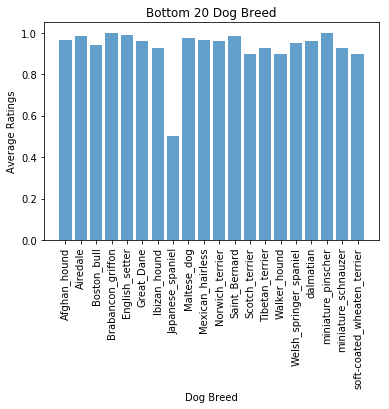

In [136]:
#Bottom 20 Breeds
bar_width = 0.8
plt.bar(df_bottom.index, df_bottom['rating_norm'], bar_width, alpha=0.7)
plt.title("Bottom 20 Dog Breed")
plt.xlabel("Dog Breed")
plt.ylabel("Average Ratings")
plt.xticks(np.arange(len(df_bottom)), rotation=90);

### Visualization of the Average Number of Likes by Dog Breed
The Likes represent the popularity of the dogs on the WeRateDogs Twitter handle with other Twitter users

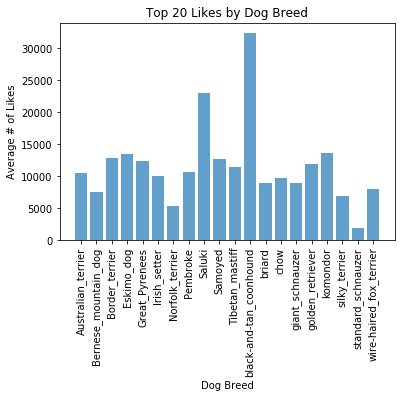

In [137]:
bar_width = 0.8
plt.bar(df_top.index, df_top['favorite_ct'], bar_width, alpha=0.7)
plt.title("Top 20 Likes by Dog Breed")
plt.xlabel("Dog Breed")
plt.ylabel("Average # of Likes")
plt.xticks(np.arange(len(df_top)), rotation=90);

### Further Insights

In [138]:
#most liked
max_fav_breed = df_top_rated[df_top_rated['favorite_ct'] == df_top_rated['favorite_ct'].max()]
max_fav_breed                           

retweet_ct  favorite_ct  rating_norm
top_pred                                                     
black-and-tan_coonhound      7685.0      32366.0          1.4

In [139]:
#most retweted breed
max_rt_breed = df_top_rated[df_top_rated['retweet_ct'] == df_top_rated['retweet_ct'].max()]
max_rt_breed       

retweet_ct  favorite_ct  rating_norm
top_pred                                                
Bedlington_terrier      7790.5      23932.5     1.033333

In [140]:
#Highest rated breed
max_rating_breed = df_top_rated[df_top_rated['rating_norm'] == df_top_rated['rating_norm'].max()]
max_rating_breed 

retweet_ct  favorite_ct  rating_norm
top_pred                                                     
black-and-tan_coonhound      7685.0      32366.0          1.4

In [141]:
#least liked
min_fav_breed = df_top_rated[df_top_rated['favorite_ct'] == df_top_rated['favorite_ct'].min()]
min_fav_breed     

retweet_ct  favorite_ct  rating_norm
top_pred                                               
Brabancon_griffon  268.333333   837.666667          1.0

In [142]:
#Least retweeted breed
min_rt_breed = df_top_rated[df_top_rated['retweet_ct'] == df_top_rated['retweet_ct'].min()]
min_rt_breed 

retweet_ct  favorite_ct  rating_norm
top_pred                                         
groenendael       261.5       1096.0          1.0

In [143]:
#Least rated breed
min_rating_breed = df_top_rated[df_top_rated['rating_norm'] == df_top_rated['rating_norm'].min()]
min_rating_breed 

retweet_ct  favorite_ct  rating_norm
top_pred                                              
Japanese_spaniel       430.0       1277.0          0.5

In [144]:
#Most reviewed dog breed
df_predict['top_pred'].value_counts().index[0]

'golden_retriever'

In [145]:
df_predict['top_pred'].value_counts().max

<bound method Series.max of golden_retriever                  150
Labrador_retriever                104
Pembroke                           90
Chihuahua                          88
pug                                56
toy_poodle                         43
chow                               42
Pomeranian                         39
Samoyed                            39
French_bulldog                     31
malamute                           30
Chesapeake_Bay_retriever           30
cocker_spaniel                     27
miniature_pinscher                 25
Staffordshire_bullterrier          21
Shih-Tzu                           20
Cardigan                           20
Eskimo_dog                         20
Siberian_husky                     19
Rottweiler                         19
German_shepherd                    19
Maltese_dog                        17
basset                             17
beagle                             17
Lakeland_terrier                   17
Shetland_sheepdog     